<a href="https://colab.research.google.com/github/saisandeep174/YBI-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction**

In [5]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/saisandeep174/YBI-project/main/heart.csv'

df = pd.read_csv(url)
print(df.shape)


(303, 14)


In [8]:
df.columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Returns true for a column having null values, else false
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<ipython-input-11-c52c45e96689>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


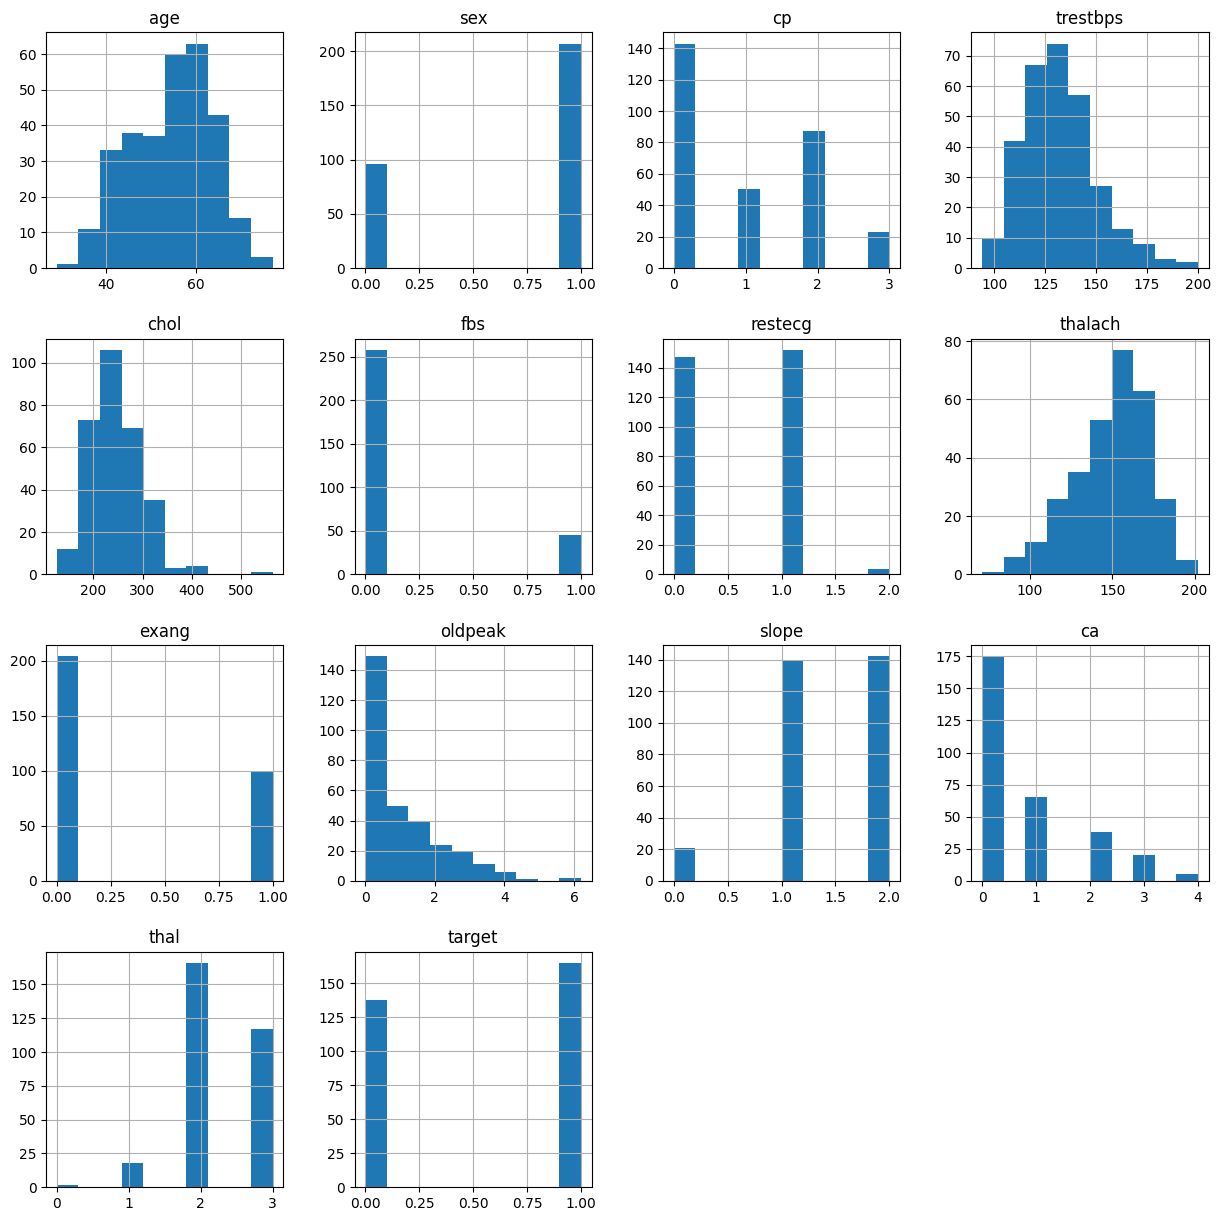

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Text(0, 0.5, 'Count')

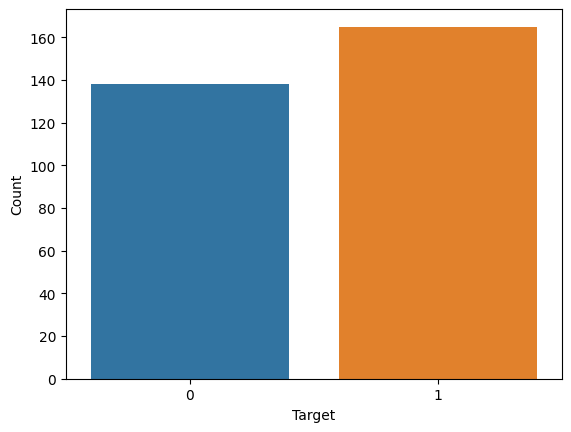

In [12]:
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

<Axes: >

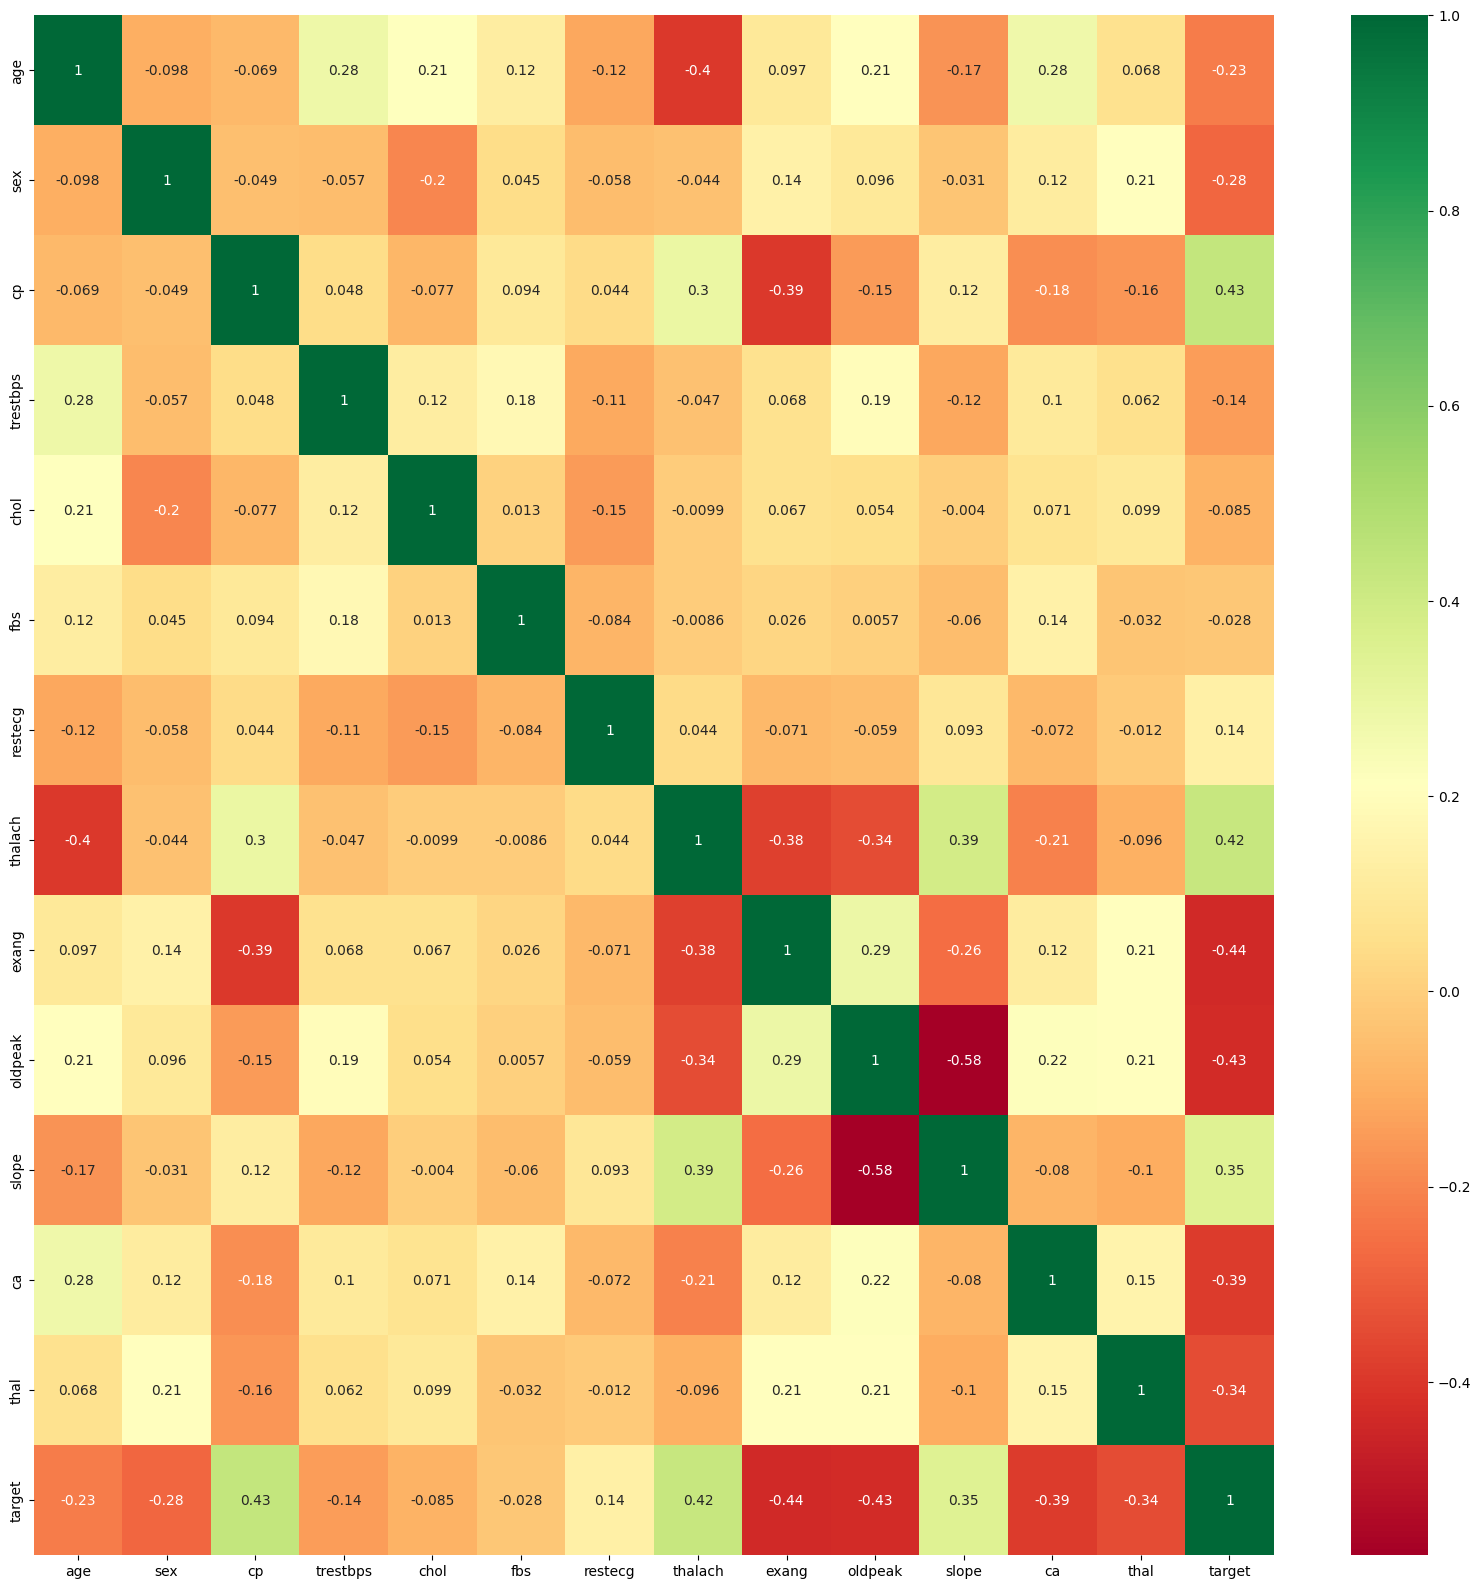

In [13]:
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [14]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [16]:
X = dataset.drop('target', axis=1)
y = dataset['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 30), (91, 30), (212,), (91,))

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=14000)
model.fit(X_train,y_train)
model.intercept_

array([0.53171773])

In [19]:
model.coef_

array([[-0.01249188, -0.26495855, -0.1796937 ,  0.11511088, -0.79038204,
         0.67705667, -0.67702245, -1.12378147,  0.0351235 ,  0.60277002,
         0.48592217, -0.1102604 ,  0.11029463, -0.06392329,  0.2067837 ,
        -0.14282618,  0.30367472, -0.30364049,  0.52605392, -0.75784253,
         0.23182284,  1.39169723, -0.92896748, -0.90695818, -0.0413387 ,
         0.48560135,  0.        ,  0.2799767 ,  0.54333809, -0.82328056]])

In [20]:
# Step 7 : predict model
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1])

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

confusion_matrix(y_test,y_pred)

array([[28, 12],
       [ 3, 48]])

In [22]:
accuracy_score(y_test,y_pred)

0.8351648351648352

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        40
           1       0.80      0.94      0.86        51

    accuracy                           0.84        91
   macro avg       0.85      0.82      0.83        91
weighted avg       0.85      0.84      0.83        91



In [24]:
# Define the parameter values for prediction
sample_data = {
    'age': 78,
    'trestbps': 245,
    'chol': 500,
    'thalach': 153,
    'oldpeak': 2.3,
    'sex_0': 0, 'sex_1': 1,  # Example values for 'sex'
    'cp_0': 1, 'cp_1': 0, 'cp_2': 1, 'cp_3': 0,  # Example values for 'cp'
    'fbs_0': 1, 'fbs_1': 0,  # Example values for 'fbs'
    'restecg_0': 2, 'restecg_1': 1, 'restecg_2': 0,  # Example values for 'restecg'
    'exang_0': 1, 'exang_1': 0,  # Example values for 'exang'
    'slope_0': 0, 'slope_1': 1, 'slope_2': 0,  # Example values for 'slope'
    'ca_0': 4, 'ca_1': 1, 'ca_2': 0, 'ca_3': 0, 'ca_4': 0,  # Example values for 'ca'
    'thal_0': 0, 'thal_1': 0, 'thal_2': 1, 'thal_3': 0  # Example values for 'thal'
}

# Create a DataFrame for the sample data
import pandas as pd

sample_df = pd.DataFrame([sample_data])

# Standardize the sample data
sample_df[columns_to_scale] = standScaler.transform(sample_df[columns_to_scale])

# Make predictions
predicted_probabilities = model.predict_proba(sample_df)  # Get the probability of each class (0 and 1)
predicted_class = model.predict(sample_df)  # Get the predicted class (0 or 1)

# Print the results
print("Predicted Probabilities:", predicted_probabilities)
print("Predicted Class:", predicted_class)


Predicted Probabilities: [[0.36413858 0.63586142]]
Predicted Class: [1]


In [37]:
# Define the parameter values for prediction
sample_data = {
    'age': 48,
    'trestbps': 135,
    'chol': 100,
    'thalach': 103,
    'oldpeak': 1.3,
    'sex_0': 0, 'sex_1': 1,  # Example values for 'sex'
    'cp_0': 1, 'cp_1': 0, 'cp_2': 1, 'cp_3': 0,  # Example values for 'cp'
    'fbs_0': 1, 'fbs_1': 0,  # Example values for 'fbs'
    'restecg_0': 2, 'restecg_1': 0, 'restecg_2': 0,  # Example values for 'restecg'
    'exang_0': 1, 'exang_1': 0,  # Example values for 'exang'
    'slope_0': 0, 'slope_1': 1, 'slope_2': 0,  # Example values for 'slope'
    'ca_0': 1, 'ca_1': 1, 'ca_2': 0, 'ca_3': 0, 'ca_4': 0,  # Example values for 'ca'
    'thal_0': 0, 'thal_1': 0, 'thal_2': 1, 'thal_3': 0  # Example values for 'thal'
}

# Create a DataFrame for the sample data
import pandas as pd

sample_df = pd.DataFrame([sample_data])

# Standardize the sample data
sample_df[columns_to_scale] = standScaler.transform(sample_df[columns_to_scale])

# Make predictions
predicted_probabilities = model.predict_proba(sample_df)  # Get the probability of each class (0 and 1)
predicted_class = model.predict(sample_df)  # Get the predicted class (0 or 1)

# Print the results
print("Predicted Probabilities:", predicted_probabilities)
print("Predicted Class:", predicted_class)


Predicted Probabilities: [[0.57426746 0.42573254]]
Predicted Class: [0]


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
# Predictions and Evaluations
# Let's evaluate our KNN model !
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24 16]
 [13 38]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.62        40
           1       0.70      0.75      0.72        51

    accuracy                           0.68        91
   macro avg       0.68      0.67      0.67        91
weighted avg       0.68      0.68      0.68        91



In [31]:
accuracy_score(y_test,pred)

0.6813186813186813